In [50]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio as rio

from rasterio.plot import show

In [3]:
facility_dir = "../data/top_20/facility_data/"

In [4]:
animal_facilities_bbox = pd.read_csv(facility_dir + "animal_facilities_bbox.csv").drop(columns=["Unnamed: 0"])
animal_report = pd.read_csv(facility_dir + "animal_report.csv")
dairy_20 = pd.read_csv(facility_dir + "dairy_20.csv").rename(columns={"Unnamed: 0": "idx"})
poultry_20 = pd.read_csv(facility_dir + "poultry_20.csv").rename(columns={"Unnamed: 0": "idx"})

In [5]:
# np.sum(animal_report.columns != s)
np.sum(dairy_20.columns != poultry_20.columns)

0

In [6]:
poultry_20.columns[~poultry_20.columns.isin(animal_report.columns)]

Index(['idx', 'geometry'], dtype='object')

=> poultry_20 and dairy_20 have added column "geometry"

In [7]:
dairy_20.shape

(20, 49)

In [8]:
dairy_20.columns

Index(['idx', 'reg_measure_id', 'reg_measure_type', 'reg_measure_title',
       'reg_measure_description', 'order_number', 'npdes_number_ca_number',
       'program', 'program_category', 'wdid', 'region', 'status',
       'effective_date', 'expiration_review_date', 'termination_date',
       'adoption_date', 'individual_general', 'fee_code',
       'facility_waste_type', 'facility_waste_type_2', 'number_of_amendments',
       'most_recent_amendment_number', 'most_recent_amendment_date',
       'most_recent_amendment_comments', 'rescission_number',
       'rescission_date', 'rescission_comments', 'facility_id',
       'facility_region', 'facility_name', 'place_type', 'place_address',
       'place_city', 'place_zip', 'place_county', 'latitude_decimal_degrees',
       'longitude_decimal_degrees', 'approved_cnty_reg_prog', 'cafo_subtype',
       'cafo_type', 'onsite', 'cafo_population', 'quality_assurance',
       'sic_code_1', 'sic_desc_1', 'animal_equivalent_units_aeu',
       'agency_n

In [9]:
dairy_20[['idx', 'reg_measure_id', 'facility_id', 'facility_region', 'facility_name', 
          'cafo_subtype', 'cafo_type', 'onsite', 'cafo_population',
          'latitude_decimal_degrees', 'longitude_decimal_degrees', 
          'geometry']].head()

,idx,reg_measure_id,facility_id,facility_region,facility_name,cafo_subtype,cafo_type,onsite,cafo_population,latitude_decimal_degrees,longitude_decimal_degrees,geometry
0,2629,335690,213447.0,5F,Vander Eyk & Son Dairy Complex,Mature dairy cattle,Dairies,N,10776.0,35.971190,-119.395600,POINT (-119.3956 35.97119)
1,3246,335639,271876.0,5F,"Gold Star Enterprises, LLC",Calf feedlots,Dairies,N,9788.0,36.150620,-119.438230,POINT (-119.43823 36.15062)
2,1979,338347,208679.0,5F,Bar 20 Dairy No. 2 & 3,Mature dairy cattle,Dairies,N,9550.0,36.735063,-120.245279,POINT (-120.245279 36.735063)
3,2181,342218,253193.0,5F,Milk Flow Dairy,Goat Dairies,Dairies,N,9000.0,36.161310,-119.765170,POINT (-119.76517 36.16131)
4,3465,334123,240169.0,5F,Meadowlake Dairy,Mature dairy cattle,Dairies,N,8880.0,36.016740,-119.422040,POINT (-119.42204 36.01674)


### How to link California animal facilities data with bbox?

`animal_facilities_bbox` has a column `idx ` that is also in `animal_facilities`/`poultry_20`/`dairy_20`. We can merge based on this column.

In [10]:
animal_facilities_bbox.shape

(40, 5)

In [11]:
animal_facilities_bbox.columns

Index(['idx', 'min_lat', 'max_lat', 'min_lon', 'max_lon'], dtype='object')

In [12]:
animal_facilities_bbox.head()

,idx,min_lat,max_lat,min_lon,max_lon
0,3958,35.646975,35.664969,-119.515025,-119.493020
1,4252,37.531475,37.549469,-120.993296,-120.970748
2,4327,36.612735,36.630729,-120.218661,-120.196384
3,4025,36.565115,36.583109,-120.105494,-120.083230
4,4391,36.476125,36.494119,-119.920801,-119.898563


In [13]:
print(len(np.unique(animal_facilities_bbox['idx'])))
print(len(np.unique(dairy_20['idx'])))

40
20


In [14]:
dairy_20_bbox = dairy_20[['idx', 'facility_name', 'cafo_subtype', 
                          'cafo_type', 'cafo_population', 'geometry']]
dairy_20_bbox = dairy_20_bbox.merge(animal_facilities_bbox)

In [15]:
dairy_20_bbox.head()

,idx,facility_name,cafo_subtype,cafo_type,cafo_population,geometry,min_lat,max_lat,min_lon,max_lon
0,2629,Vander Eyk & Son Dairy Complex,Mature dairy cattle,Dairies,10776.0,POINT (-119.3956 35.97119),35.962195,35.980189,-119.406628,-119.384536
1,3246,"Gold Star Enterprises, LLC",Calf feedlots,Dairies,9788.0,POINT (-119.43823 36.15062),36.141625,36.159619,-119.449284,-119.427141
2,1979,Bar 20 Dairy No. 2 & 3,Mature dairy cattle,Dairies,9550.0,POINT (-120.245279 36.735063),36.726068,36.744062,-120.256416,-120.234106
3,2181,Milk Flow Dairy,Goat Dairies,Dairies,9000.0,POINT (-119.76517 36.16131),36.152315,36.170309,-119.776225,-119.754079
4,3465,Meadowlake Dairy,Mature dairy cattle,Dairies,8880.0,POINT (-119.42204 36.01674),36.007745,36.025739,-119.433075,-119.410970


### Linking to NAIP

The folder `naip` gives all NAIP imagery for a given bounding box.

The image is named `<animal_report.csv idx>_<month>_<day>_<year>.tif`

Clearly, the tough work of locating farms and linking them to NAIP imagery is done. This is true for `all_farms` too, not just the top 20. The images are named in the same way.

In [16]:
naip_dir = "../data/top_20/naip/"
farm_idx = dairy_20_bbox['idx'][1] # just take the first one
naip_files = np.sort(glob.glob(naip_dir + f'{farm_idx}_*_*_*.tif'))


In [17]:
naip_files

array(['../data/top_20/naip/3246_06_04_03 (1).tif',
       '../data/top_20/naip/3246_06_04_03.tif',
       '../data/top_20/naip/3246_06_18_14 (1).tif',
       '../data/top_20/naip/3246_06_18_14.tif',
       '../data/top_20/naip/3246_06_21_09 (1).tif',
       '../data/top_20/naip/3246_06_21_09.tif',
       '../data/top_20/naip/3246_06_24_22 (1).tif',
       '../data/top_20/naip/3246_06_24_22.tif',
       '../data/top_20/naip/3246_06_25_10.tif',
       '../data/top_20/naip/3246_06_27_10.tif',
       '../data/top_20/naip/3246_06_30_12 (1).tif',
       '../data/top_20/naip/3246_06_30_12.tif',
       '../data/top_20/naip/3246_06_30_16 (1).tif',
       '../data/top_20/naip/3246_06_30_16.tif',
       '../data/top_20/naip/3246_07_01_05 (1).tif',
       '../data/top_20/naip/3246_07_01_05.tif',
       '../data/top_20/naip/3246_07_03_04 (1).tif',
       '../data/top_20/naip/3246_07_03_04.tif',
       '../data/top_20/naip/3246_07_05_06 (1).tif',
       '../data/top_20/naip/3246_07_05_06.tif',
    

In [18]:
images = [rio.open(file).read() for file in naip_files]

In [35]:
print(images[0].shape)

(3, 4136, 2656)


NAIP is normal RBG imagery.

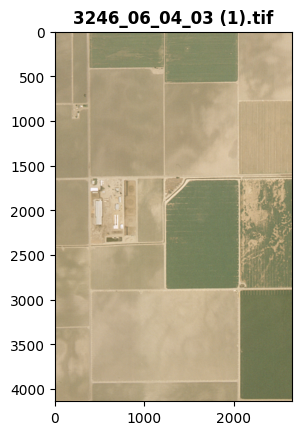

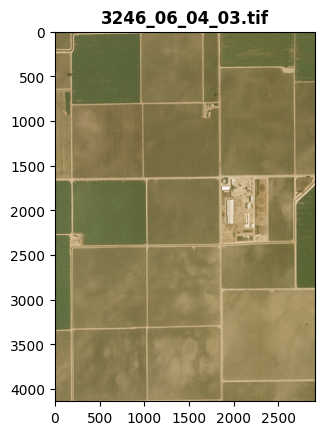

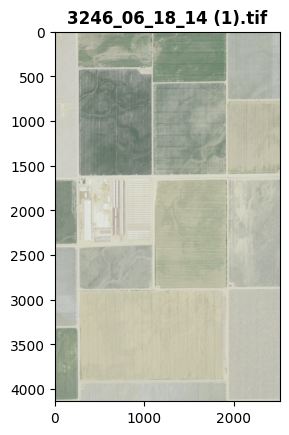

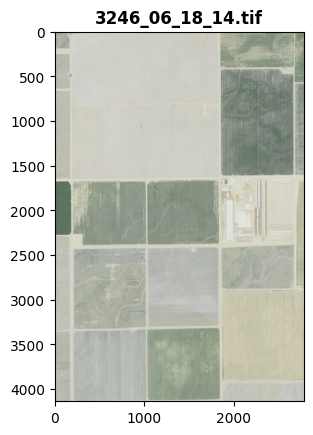

In [19]:
for i in range(4):
    show(images[i], title = naip_files[i][len(naip_dir):])

Duplicates of a farm (indicated by (1) in the filename) on a day mean that there are several images with the farm from the same day.

### Linking to PlanetScope

The folder `psscenes` gives all PlanetScope imagery corresponding to NAIP imagery. We only have this data in the top 20 folder.

The scene is given in a folder named `<animal_report.csv idx>_<year>`. Inside the folder are the PlanetScope images for the week of April 8-15 of the given year named `*_AnalyticMS_SR_clip_reproject.tif`. The additional metadata is given in `*_udm2_clip_reproject.tif` [[link](https://developers.planet.com/docs/data/udm-2/)].

The metadata are "Usable Data Masks" that have various indicators for how usable the image is. We have pixed level classification for clear map/snow/shadow/light haze/heavy haze/cloud as well as confidence (in classification). See the link above for more details and code below for an example.

In [20]:
farm_year = "2629_2019" # the previous farm is not in psscenes
ps_dir = "../data/top_20/psscenes/"
ps_files = np.sort(glob.glob(ps_dir + farm_year + f'/*_AnalyticMS_SR_clip_reproject.tif'))
udm_files = np.sort(glob.glob(ps_dir + farm_year + f'/*_udm2_clip_reproject.tif'))

In [21]:
print(ps_files)
print(udm_files)

['../data/top_20/psscenes/2629_2019/20190409_182531_66_1057_3B_AnalyticMS_SR_clip_reproject.tif'
 '../data/top_20/psscenes/2629_2019/20190412_185452_02_1065_3B_AnalyticMS_SR_clip_reproject.tif'
 '../data/top_20/psscenes/2629_2019/20190414_182641_46_105e_3B_AnalyticMS_SR_clip_reproject.tif']
['../data/top_20/psscenes/2629_2019/20190409_182531_66_1057_3B_udm2_clip_reproject.tif'
 '../data/top_20/psscenes/2629_2019/20190412_185452_02_1065_3B_udm2_clip_reproject.tif'
 '../data/top_20/psscenes/2629_2019/20190414_182641_46_105e_3B_udm2_clip_reproject.tif']


In [28]:
ps_images = [rio.open(file).read() for file in ps_files]
udm_images = [rio.open(file).read() for file in udm_files]

In [34]:
print(ps_images[0].shape)
print(udm_images[0].shape)

(4, 701, 696)
(8, 701, 696)


PlanetScope is not just RGB! 
For the images, it has 4 bands: blue, green, red, and near-infrared (in that order).

Some helpful links:
* https://samapriya.github.io/open-impact/satsummit2018/projects/Inspecting%20Satellite%20Imagery/
* https://samapriya.github.io/open-impact/satsummit2018/projects/Visualizing%20Satellite%20Imagery/

#### Plotting PlanetScope

In [48]:
b, g, r, n = ps_images[0]

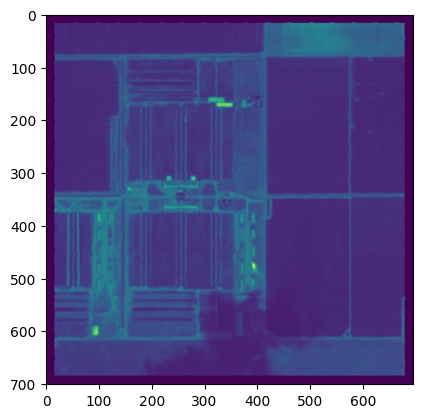

In [51]:
# plot the blue band
fig = plt.imshow(b)
plt.show()

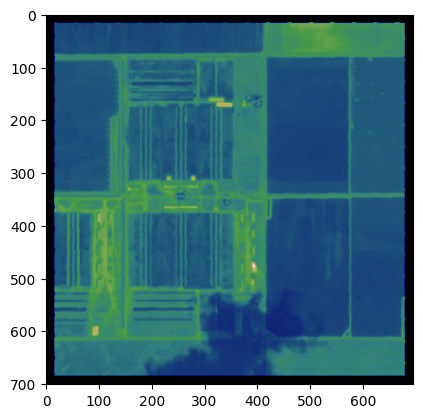

In [52]:
# Plot the green band using a non-default color ramp.
fig = plt.imshow(g)
fig.set_cmap('gist_earth')
plt.show()

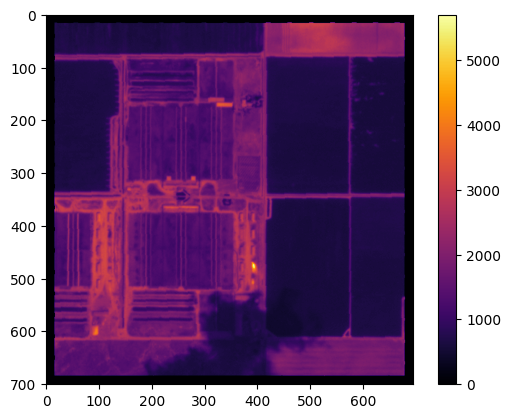

In [53]:
# Plot the red band and add a color bar.
fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

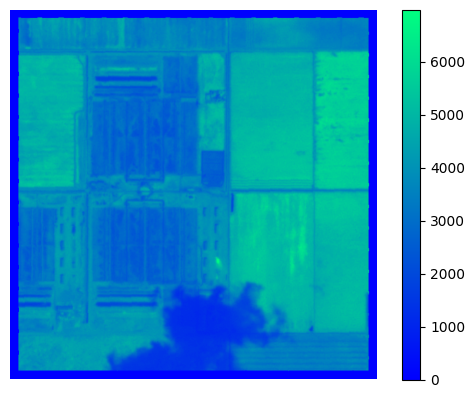

In [54]:
# Plot the NIR band.
fig = plt.imshow(n)
fig.set_cmap('winter')
plt.colorbar()
plt.axis('off')
plt.show()

#### Exploring UDM

In [64]:
band_names = ["clear", "snow", "shadow", "light_haze", "heavy_haze", "cloud", 
              "confidence", "unusable"]

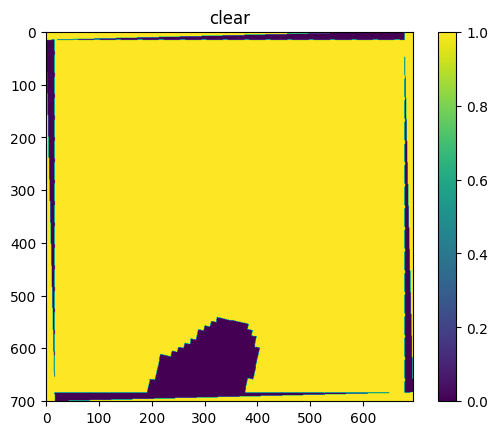

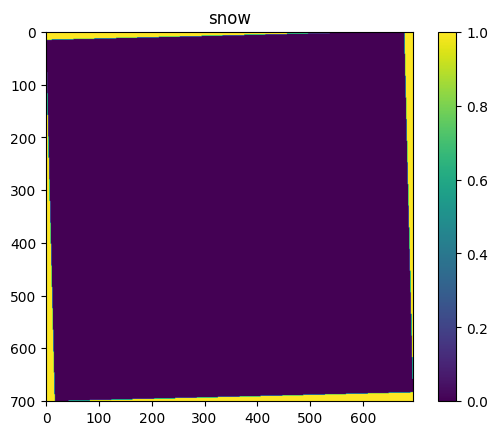

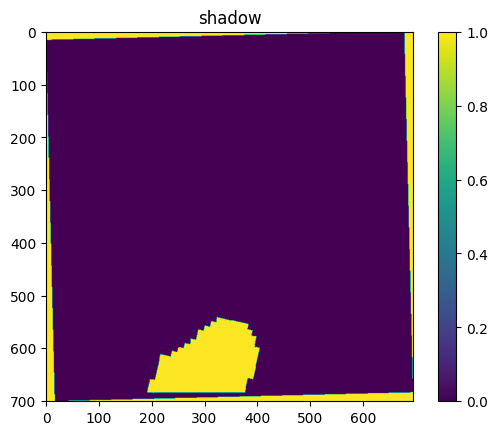

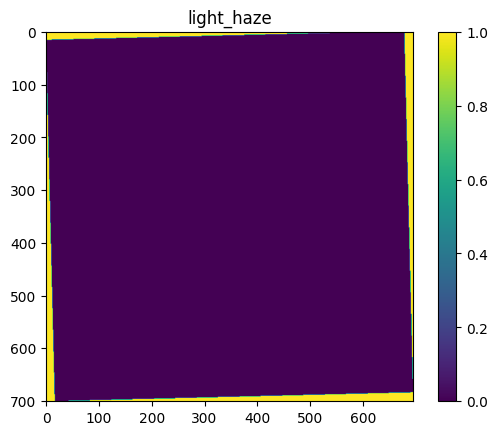

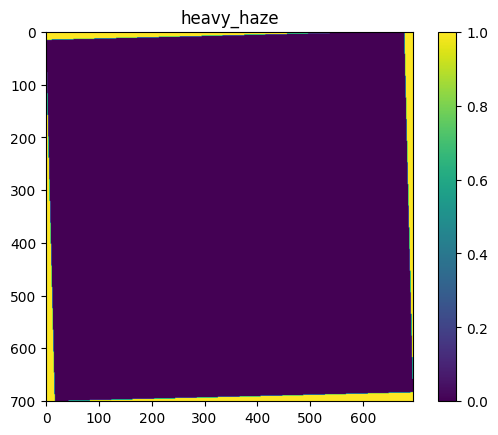

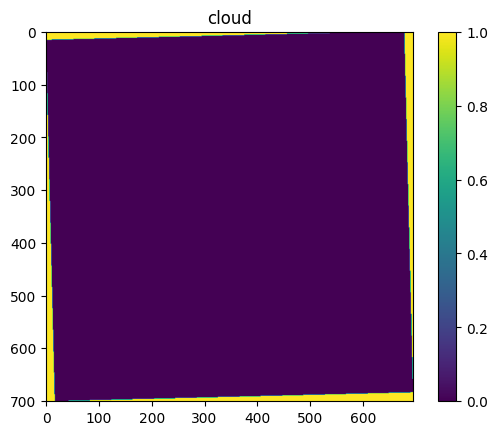

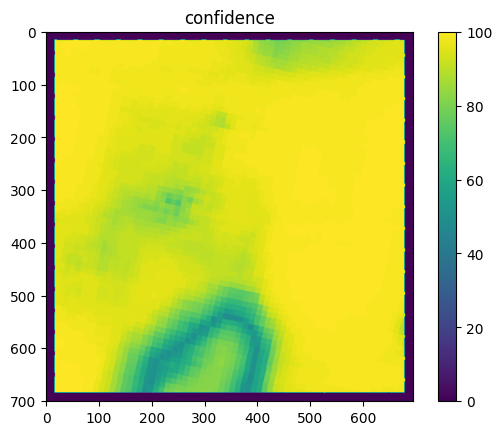

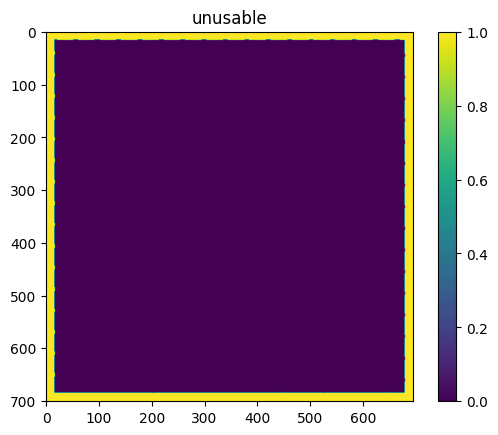

In [66]:
for i in range(8):
    plt.imshow(udm_images[0][i])
    plt.title(band_names[i])
    plt.colorbar()
    plt.show()